In [1]:
import numpy as np
from sklearn import svm
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
import seaborn as sns

#### Load Labeled Training Embeddings

In [5]:
TRAIN_PATH = '../data/embed/Embeddings/'
x = []
y = []
for file_name in [file for file in os.listdir(TRAIN_PATH) if file.endswith('.npy')]:
    frames = np.load(TRAIN_PATH + file_name)
    frames = frames.reshape(-1, 17*512)
    frames = np.mean(frames, axis=0)
    if file_name.startswith("Perfect"):
        y.append("Good_form")
    else:
        y.append("Overstride/Heelstrike")
    x.append(frames)

#### Load Test Embedding

In [8]:
TEST_PATH = '../data/embed/oliver/IMG_5046.npy'
overstride_frames = np.load(TEST_PATH)
overstride_frames = overstride_frames.reshape(-1, 17*512)
overstride_frames = np.mean(overstride_frames, axis=0)

#### Partition Data and Fit the SVM

In [9]:
np.random.seed(69)
x = np.asarray(x)
y = np.asarray(y)
print(x.shape)
kf = KFold(n_splits=4, shuffle=True,random_state=16)
cnt = 1
for train_index, test_index in kf.split(x, y):
    x_train, y_train = x[train_index], y[train_index]
    x_test, y_test = x[test_index], y[test_index]

    support = svm.LinearSVC(random_state=cnt)
    support.fit(x_train, y_train)
    predicted = support.predict(x_train)
    score = accuracy_score(y_train, predicted)
    print(f'Training Accuracy for Fold {cnt}: {score}')
    predicted = support.predict(x_test)
    score = accuracy_score(y_test, predicted)
    print(f'Test Accuracy for Fold {cnt}: {score}')
    print()
    cnt += 1

(18, 8704)
Training Accuracy for Fold 1: 1.0
Test Accuracy for Fold 1: 0.8



/Users/becklabash/Documents/AI/form-repr/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/becklabash/Documents/AI/form-repr/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy for Fold 2: 0.9230769230769231
Test Accuracy for Fold 2: 0.6

Training Accuracy for Fold 3: 0.8571428571428571
Test Accuracy for Fold 3: 0.75



/Users/becklabash/Documents/AI/form-repr/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/Users/becklabash/Documents/AI/form-repr/env/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Training Accuracy for Fold 4: 0.7857142857142857
Test Accuracy for Fold 4: 0.75



#### Visualize with t-SNE

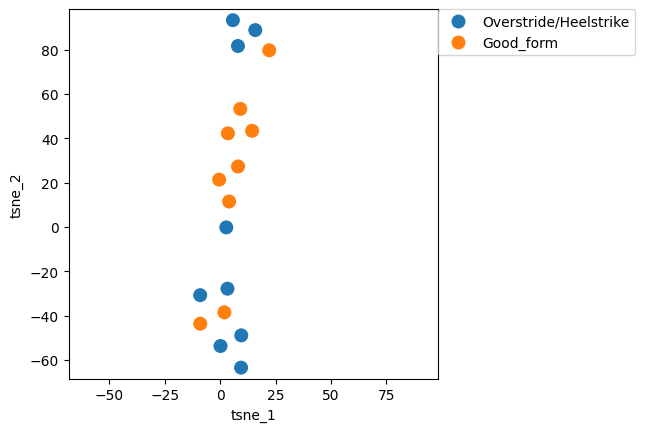

In [10]:
n_components = 2
tsne = TSNE(n_components, perplexity=5)
x = np.asarray(x)

tsne_result = tsne.fit_transform(x)
tsne_result_df = pd.DataFrame({'tsne_1': tsne_result[:, 0], 'tsne_2': tsne_result[:, 1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result_df, ax=ax, s=120)
lim = (tsne_result.min() - 5, tsne_result.max() + 5)
ax.set_xlim(lim)
ax.set_ylim(lim)
plt.legend()
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
plt.show()